### Ткаченко Владислав Львович ИУ5-62Б

#### Вариант 18 Задача №3 Датасет №2

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('dc-wikia-data.csv')

In [2]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   GSM               64 non-null     object 
 9   ALIVE             6893 non-null   object 
 10  APPEARANCES       6541 non-null   float64
 11  FIRST APPEARANCE  6827 non-null   object 
 12  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


In [4]:
df.drop(df[df['APPEARANCES'].isnull()].index, inplace=True)

In [5]:
df.drop(df[df['SEX'].isnull()].index, inplace=True)

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
scaler = MinMaxScaler()
appear_data = scaler.fit_transform(pd.DataFrame(df['APPEARANCES']))
df_appear = pd.DataFrame(appear_data)

In [8]:
df_appear.describe()

,0
count,6427.000000
mean,0.007397
std,0.028493
min,0.000000
25%,0.000323
50%,0.001617
75%,0.004528
max,1.000000


In [9]:
df['SEX'].value_counts()

Male Characters           4527
Female Characters         1880
Genderless Characters       19
Transgender Characters       1
Name: SEX, dtype: int64

In [10]:
labelencoder = LabelEncoder()
sex_arr = labelencoder.fit_transform(df['SEX'])
sex_df = pd.DataFrame(sex_arr)

In [11]:
sex_df.value_counts().sort_values(ascending=False)

2    4527
0    1880
1      19
3       1
dtype: int64

In [12]:
onehotencoder = OneHotEncoder()
sex_arr = onehotencoder.fit_transform(pd.DataFrame(df['SEX'])).toarray()
sex_df = pd.DataFrame(sex_arr)
sex_df.columns = ['is_female', 'is_genderless', 'is_male', 'is_transgender']

In [13]:
sex_df.describe()

,is_female,is_genderless,is_male,is_transgender
count,6427.000000,6427.000000,6427.000000,6427.000000
mean,0.292516,0.002956,0.704372,0.000156
std,0.454953,0.054295,0.456360,0.012474
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


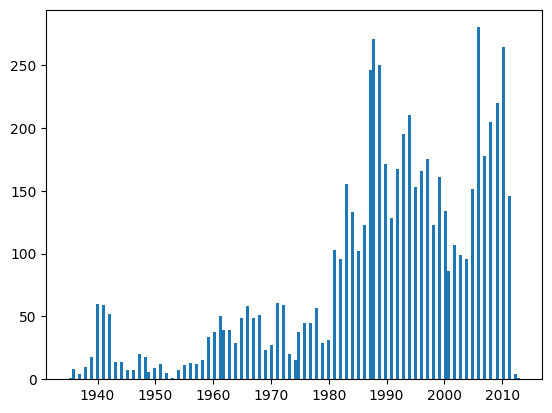

In [27]:
n = plt.hist(df['YEAR'], 150)